### Functions

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# The address of the folder where the images are located
path = "Chest"
image_list = os.listdir(path)
loaded_image = []
image_size = 1000

# Create the "Mask" directory if it doesn't exist
current_dir = os.getcwd()
output_dir = os.path.join(current_dir, "Mask")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
# Display images
def display_image(image, txt):
    plt.imshow(image, 'gray')
    plt.title(txt, color='black', fontsize=14)
    plt.axis('off')
    plt.show()
    
# Separator of white and black lungs    
def black_white (image):
    # Because the color of the lungs is not the same in different images, I divided the lungs into two groups: white lungs and black lungs.
    # To determine whether the lung is black or white, I selected a square (10x10) from the part of the images that is definitely inside 
    # the lung and averaged the color value of the pixels inside the square.
    rectangle = image[30:40, 30:40]
    mean_pixel = np.mean(rectangle)
    
    # black lungs
    if mean_pixel < 100:
        # Manually threshold
        image = np.where(image > 140, 255, image)
        image = np.where(image < 140, 0, image)  
        # Binary inverse to whiten the color of the lungs
        ret, image = cv2.threshold(image, 70, 255, cv2.THRESH_BINARY_INV)
    
    # white lungs
    else :
        # Manually threshold
        image = np.where(image > 80, 255, image)
        image = np.where(image < 100, 0, image) 
    
    return image

### Stage display

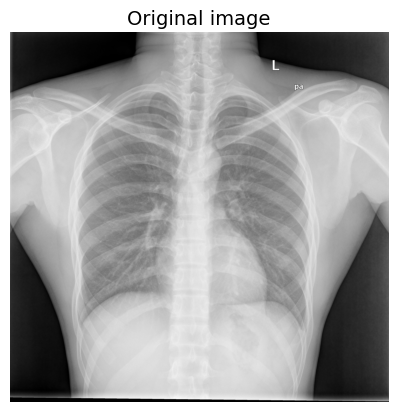

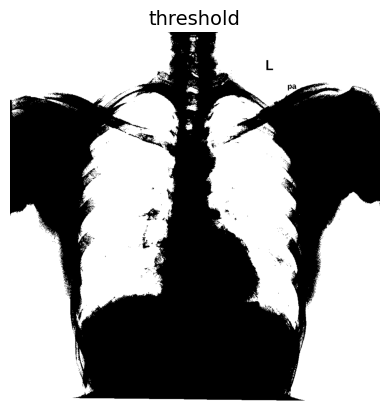

In [2]:
for image_name in image_list:                            # Select image from folder  
    # opening
    image = Image.open(os.path.join(path, image_name))
    display_image(image, 'Original image')  
    
    # resizing
    image = image.resize((image_size, image_size)) 
       
    # Convert to numpy array
    image = np.array(image)  
    
    # black amd white lung threshold
    image = black_white(image)
    display_image(image, 'threshold')